## Supervised Learning - Building a Student Performance Classification System


#### The aim of this project is to predict how likely a student is to pass. 

This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Drop missing values.

4.Transform Data

5.Drop variables with less variance

6.Encode all categorical variables to numerical

7.Convert the continuous values of grades into classes

8.Apply the models.

9.Visualization

10.Provide insights.

11.Training and testing data split

12.Model Implementation and Testing the Accuracy

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [2]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype
import seaborn as sns

## Exploring the Data

## Question 1 - Read Dataset, Print Columns and Drop missing values


#### Answer:

#In case you are working in Google Colab, Upload the csv file to colab.
from google.colab import files

uploaded = files.upload()

In [4]:
# Read dataset using pandas and print few rows
# Hint: Read the dataset file using pandas.read_csv(). Take care about the delimiter.

students_df = pd.read_csv('D://AIML STUDY MATERIAL//SupervisedLearning//Lab_Internal//students-data.csv',sep=";")

In [5]:
# Shape of the Data Set

students_df.shape

(395, 33)

In [6]:
# Print the columns in the dataframe
for idx in students_df.columns:
        print(' Attribute name - ',idx, ' is of dtypes - ',students_df.dtypes[idx])

 Attribute name -  school  is of dtypes -  object
 Attribute name -  sex  is of dtypes -  object
 Attribute name -  age  is of dtypes -  int64
 Attribute name -  address  is of dtypes -  object
 Attribute name -  famsize  is of dtypes -  object
 Attribute name -  Pstatus  is of dtypes -  object
 Attribute name -  Medu  is of dtypes -  int64
 Attribute name -  Fedu  is of dtypes -  int64
 Attribute name -  Mjob  is of dtypes -  object
 Attribute name -  Fjob  is of dtypes -  object
 Attribute name -  reason  is of dtypes -  object
 Attribute name -  guardian  is of dtypes -  object
 Attribute name -  traveltime  is of dtypes -  int64
 Attribute name -  studytime  is of dtypes -  int64
 Attribute name -  failures  is of dtypes -  int64
 Attribute name -  schoolsup  is of dtypes -  object
 Attribute name -  famsup  is of dtypes -  object
 Attribute name -  paid  is of dtypes -  object
 Attribute name -  activities  is of dtypes -  object
 Attribute name -  nursery  is of dtypes -  object


In [7]:
# Drop missing values
# Hint: Set the index name of the dataframe to "number". Check sample of data to drop if any missing values are there

if(students_df.isnull().sum().any()):
        print('The dataset contains null data points')
else:
    print('There are no null data points and the dataset is clean to use')

There are no null data points and the dataset is clean to use


In [8]:
students_df.index.name ='number'

students_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Transform Data

## Question 2 - Print all the attribute names which are not numerical.

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [9]:
for idx in students_df.columns:
        #if(is_string_dtype(students_df.dtypes[idx]) or is_object_dtype(students_df.dtypes[idx])):
         if( not is_numeric_dtype(students_df.dtypes[idx])):
            print(' Attribute name - ',idx, ' is of dtypes - ',students_df.dtypes[idx])

 Attribute name -  school  is of dtypes -  object
 Attribute name -  sex  is of dtypes -  object
 Attribute name -  address  is of dtypes -  object
 Attribute name -  famsize  is of dtypes -  object
 Attribute name -  Pstatus  is of dtypes -  object
 Attribute name -  Mjob  is of dtypes -  object
 Attribute name -  Fjob  is of dtypes -  object
 Attribute name -  reason  is of dtypes -  object
 Attribute name -  guardian  is of dtypes -  object
 Attribute name -  schoolsup  is of dtypes -  object
 Attribute name -  famsup  is of dtypes -  object
 Attribute name -  paid  is of dtypes -  object
 Attribute name -  activities  is of dtypes -  object
 Attribute name -  nursery  is of dtypes -  object
 Attribute name -  higher  is of dtypes -  object
 Attribute name -  internet  is of dtypes -  object
 Attribute name -  romantic  is of dtypes -  object


## Question 3 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [10]:
for idx in students_df.columns:
        if(is_numeric_dtype(students_df.dtypes[idx])and students_df[idx].var() < 1):
            print(' Attribute name - ',idx, ' has variance less than 1') 
            students_df.drop(idx,axis=1,inplace =True)

 Attribute name -  traveltime  has variance less than 1
 Attribute name -  studytime  has variance less than 1
 Attribute name -  failures  has variance less than 1
 Attribute name -  famrel  has variance less than 1
 Attribute name -  freetime  has variance less than 1
 Attribute name -  Dalc  has variance less than 1


In [11]:
students_df.shape

(395, 27)

In [12]:
students_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
for idx in range(0,students_df.shape[1]):
         if( not is_numeric_dtype(students_df.dtypes[idx])):
            students_df[students_df.columns[idx]] = le.fit_transform(students_df[students_df.columns[idx]])

In [15]:
students_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [16]:
for idx in students_df.columns:
        if(idx== 'G1' or idx == 'G2' or idx == 'G3'):
                students_df[idx] = students_df[idx].apply(lambda x: 1 if (x >= 10) else 0)

In [17]:
students_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Apply the models.

## Question 6 - Separate Feature and Target
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [18]:
# Target values are G3

# Feature set is remaining features
# Copy all the predictor variables into X dataframe. Since 'G3' is dependent variable drop it
X = students_df.drop('G3', axis=1)

# Copy the 'G3' column alone into the y dataframe. This is the dependent variable
y = students_df[['G3']]

In [19]:
X.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [20]:
y.head(5)

,G3
number,
0,0
1,0
2,1
3,1
4,1


In [21]:
print(X.shape)
print(y.shape)

(395, 26)
(395, 1)


## Visualization

## Question 7 - Plot G2 and G3 and give your understanding on relation between both variables.

* Hint:Bar plot to compare counts of '0' and '1' in G2 and G3

In [22]:
pd.crosstab(students_df.G2,students_df.G3)

G3,0,1
G2,,
0,122,24
1,8,241


In [23]:
students_df['G2'].value_counts()

1    249
0    146
Name: G2, dtype: int64

In [24]:
students_df['G3'].value_counts()

1    265
0    130
Name: G3, dtype: int64

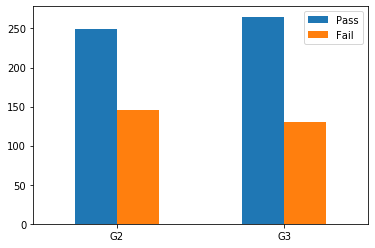

In [25]:

df_grade = pd.DataFrame({'Pass': [students_df['G2'].value_counts()[1],students_df['G3'].value_counts()[1]],
                         'Fail': [students_df['G2'].value_counts()[0],students_df['G3'].value_counts()[0]]},
                         index=['G2','G3'])
df_grade.plot.bar(rot=0)

<font color=darkblue>

# Observations on G2 and G3:
- Students passed on G3 is more in number than G2
- Students Who passed on G2 should be passed in G3 as the number of failures on G3 is reduced on comparing to G2.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8 - Plot the number of students in each school and number of students with different ages in separate plots.

* Hint: Bar plots using unique value counts

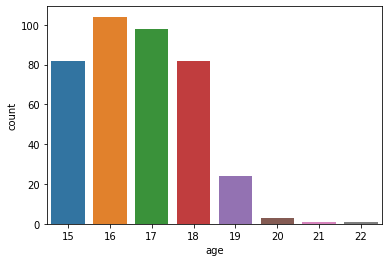

In [26]:
sns.countplot(x='age',data=students_df)

<font color=darkblue>

# Observations on No.of students with different age:
- Students with age 16 are studing more in number
- Mostly the age of the students are from >=15 and <=22
- Students of Age 15 and Age 18 are almost equal in number
- Ranking of students based on the strengths
    - Age 16 
    - Age 17
    - Age 15 and Age 18
    - Age 19
    - Age 20
    - Age 21 and Age 22

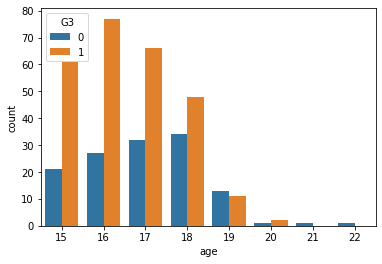

In [27]:
sns.countplot(x='age',data=students_df, hue='G3')

<font color=darkblue>

# Observations on No.of students against Target Variable G3:
- Students with age 17 has a more pass percentage in G3.
- Seeing 100% failure on G3 for ages >20
- Ranking of students based on the Pass Percent
    - Age 17  - 0.78%
    - Age 15  - 0.75%
    - Age 16  - 0.68%
    - Age 18  - 0.60%
    - Age 20  - 0.60%
    - Age 19  - 0.40%
    - Age 21  - 0.00%
    - Age 22  - 0.00%

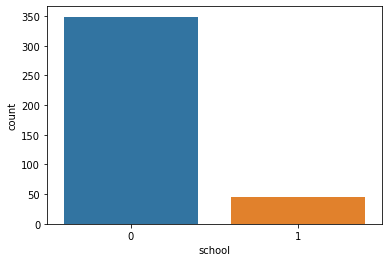

In [28]:
sns.countplot(x='school',data=students_df)

<font color=darkblue>

# Observations on n.o of students in each School:

-  N.o of students in Gabriel Pereira is 349
-  N.o of students in Mousinho da Silveira is 46
-  Students in G.P is more in number than M.S


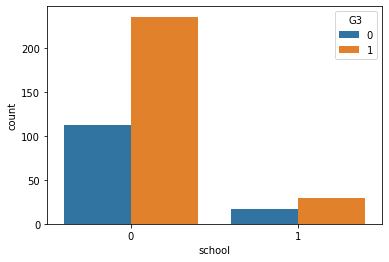

In [29]:
sns.countplot(x='school',data=students_df, hue='G3')

<font color=darkblue>

# Observations on n.o of students in each School against G3:

-  N.o of students passed in G3 from Gabriel Pereira is 0.68%
-  N.o of students passed in G3 from Mousinho da Silveira is 0.65%
-  N.o of students  in each school against G3 doesn't looks have a strong correlation.


## Question 9 - Training and Testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [30]:
from sklearn.model_selection import  train_test_split

In [31]:
# Set the number of training points
#num_train = ##

# Set the number of testing points
#num_test = ##

# Shuffle and split the dataset into the number of training and testing points above

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.24, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression, Naive Bayes and KNN** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

Logistic Regression

In [33]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predicted_test = lr.predict(X_test)
predicted_train = lr.predict(X_train)

print("Testing Accuracy for Logistic Regression  is")
print(lr.score(X_test,y_test))
print("Training Accuracy for Logistic Regression is")
print(lr.score(X_train,y_train))

Testing Accuracy for Logistic Regression  is
0.9052631578947369
Training Accuracy for Logistic Regression is
0.9333333333333333


In [43]:
print('----Logistic Regression Testing Confusion Matrix----',"\n")
print(confusion_matrix(y_test,predicted_test))
print("\n")

print('-----Logistic Regression Testing F1 Score----',"\n")
print(f1_score(y_test,predicted_test))
print("\n")

print('-----Logistic Regression Testing classification_report----',"\n")
print(classification_report(y_test,predicted_test))
print("\n")

print('-----Logistic Regression Testing accuracy Score----',"\n")

print(accuracy_score(y_test,predicted_test))

----Logistic Regression Testing Confusion Matrix---- 

[[25  3]
 [ 6 61]]


-----Logistic Regression Testing F1 Score---- 

0.931297709923664


-----Logistic Regression Testing classification_report---- 

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



-----Logistic Regression Testing accuracy Score---- 

0.9052631578947369


<font color=darkblue>

# Observations from Logistics Regression Test Set:

-  Logistic Regression Test Set has an acuracy of 0.91%
-  Precision on G3 fail =0.81
-  Precision on G3 pass =0.95
-  Recall on G3 fail =0.89
-  Recall on G3 pass =0.91


In [41]:
print('----Logistic Regression Training Confusion Matrix----',"\n")
print(confusion_matrix(y_train,predicted_train))
print("\n")

print('-----Logistic Regression Training F1 Score----',"\n")
print(f1_score(y_train,predicted_train))
print("\n")

print('-----Logistic Regression Training classification_report----',"\n")
print(classification_report(y_train,predicted_train))
print("\n")

print('-----Logistic Regression Training accuracy Score----',"\n")

print(accuracy_score(y_train,predicted_train))

----Logistic Regression Training Confusion Matrix---- 

[[ 96   6]
 [ 14 184]]


-----Logistic Regression Training F1 Score---- 

0.9484536082474226


-----Logistic Regression Training classification_report---- 

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       102
           1       0.97      0.93      0.95       198

    accuracy                           0.93       300
   macro avg       0.92      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



-----Logistic Regression Training accuracy Score---- 

0.9333333333333333


<font color=darkblue>

# Observations from Logistics Regression Train Set:

-  Logistic Regression Train Set has an acuracy of 0.93%
-  Precision on G3 fail =0.87
-  Precision on G3 pass =0.97
-  Recall on G3 fail =0.94
-  Recall on G3 pass =0.93
-  <b>Overall this model looks to be a fit model as the accuracy of train and test set is >90 </b>

Naive Bayes Classifier

In [45]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
predicted_NB_test = nb_model.predict(X_test)
predicted_NB_train = nb_model.predict(X_train)
print("Testing Accuracy for Naive Bayes is")
print(nb_model.score(X_test,y_test))
print("Training Accuracy for Naive Bayes is")
print(nb_model.score(X_train,y_train))

Testing Accuracy for Naive Bayes is
0.8842105263157894
Training Accuracy for Naive Bayes is
0.8966666666666666


In [46]:
print('----Naive Bayes Testing Confusion Matrix----',"\n")
print(confusion_matrix(y_test,predicted_NB_test))
print("\n")

print('-----Naive Bayes Testing F1 Score----',"\n")
print(f1_score(y_test,predicted_NB_test))
print("\n")

print('-----Naive Bayes Testing classification_report----',"\n")
print(classification_report(y_test,predicted_NB_test))
print("\n")

print('-----Naive Bayes Testing accuracy Score----',"\n")

print(accuracy_score(y_test,predicted_NB_test))

----Naive Bayes Testing Confusion Matrix---- 

[[25  3]
 [ 8 59]]


-----Naive Bayes Testing F1 Score---- 

0.9147286821705426


-----Naive Bayes Testing classification_report---- 

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.95      0.88      0.91        67

    accuracy                           0.88        95
   macro avg       0.85      0.89      0.87        95
weighted avg       0.89      0.88      0.89        95



-----Logistic Regression Testing accuracy Score---- 

0.8842105263157894


<font color=darkblue>

# Observations from Naive Bayes Test Set:

-  Naive Bayes Test Set has an acuracy of 0.88%
-  Precision on G3 fail =0.76
-  Precision on G3 pass =0.95
-  Recall on G3 fail =0.89
-  Recall on G3 pass =0.88


In [47]:
print('----Naive Bayes Training Confusion Matrix----',"\n")
print(confusion_matrix(y_train,predicted_NB_train))
print("\n")

print('-----Naive Bayes Training F1 Score----',"\n")
print(f1_score(y_train,predicted_NB_train))
print("\n")

print('-----Naive Bayes Training classification_report----',"\n")
print(classification_report(y_train,predicted_NB_train))
print("\n")

print('-----Naive Bayes Training accuracy Score----',"\n")

print(accuracy_score(y_train,predicted_NB_train))

----Naive Bayes Training Confusion Matrix---- 

[[ 94   8]
 [ 23 175]]


-----Naive Bayes Training F1 Score---- 

0.9186351706036745


-----Naive Bayes Training classification_report---- 

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       102
           1       0.96      0.88      0.92       198

    accuracy                           0.90       300
   macro avg       0.88      0.90      0.89       300
weighted avg       0.90      0.90      0.90       300



-----Naive Bayes Training accuracy Score---- 

0.8966666666666666


<font color=darkblue>

# Observations from Naive Bayes Train Set:

-  Naive Bayes Train Set has an acuracy of 0.90%
-  Precision on G3 fail =0.80
-  Precision on G3 pass =0.96
-  Recall on G3 fail =0.92
-  Recall on G3 pass =0.88
-  <b>Overall this model looks to be  almost a fit model as the accuracy of train and test set is >85 </b>

K-neighbours Classifier

In [48]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean')
NNH.fit(X_train, y_train)
predicted_KNN_test = NNH.predict(X_test)
predicted_KNN_train = NNH.predict(X_train)
print("Testing Accuracy KNN is")
print(NNH.score(X_test,y_test))
print("Training Accuracy KNN is")
print(NNH.score(X_train,y_train))

Testing Accuracy KNN is
0.7368421052631579
Training Accuracy KNN is
0.7866666666666666


In [50]:
print('----Knn Training Confusion Matrix----',"\n")
print(confusion_matrix(y_train,predicted_KNN_train))
print("\n")

print('-----Knn Training F1 Score----',"\n")
print(f1_score(y_train,predicted_KNN_train))
print("\n")

print('-----Knn Training classification_report----',"\n")
print(classification_report(y_train,predicted_KNN_train))
print("\n")

print('-----KNN Training accuracy Score----',"\n")
print(accuracy_score(y_train,predicted_KNN_train))

----Knn Training Confusion Matrix---- 

[[ 52  50]
 [ 14 184]]


-----Knn Training F1 Score---- 

0.8518518518518517


-----Knn Training classification_report---- 

              precision    recall  f1-score   support

           0       0.79      0.51      0.62       102
           1       0.79      0.93      0.85       198

    accuracy                           0.79       300
   macro avg       0.79      0.72      0.74       300
weighted avg       0.79      0.79      0.77       300



-----KNN Training accuracy Score---- 

0.7866666666666666


<font color=darkblue>

# Observations from KNN Train Set:

-  KNN Train Set has an acuracy of 0.78%
-  Precision on G3 fail =0.79
-  Precision on G3 pass =0.79
-  Recall on G3 fail =0.51
-  Recall on G3 pass =0.93

In [52]:
print('----Knn Testing Confusion Matrix----',"\n")
print(confusion_matrix(y_test,predicted_KNN_test))
print("\n")

print('-----Knn Testing F1 Score----',"\n")
print(f1_score(y_test,predicted_KNN_test))
print("\n")

print('-----Knn Testing classification_report----',"\n")
print(classification_report(y_test,predicted_KNN_test))
print("\n")

print('-----KNN Testing accuracy Score----',"\n")
print(accuracy_score(y_test,predicted_KNN_test))

----Knn Testing Confusion Matrix---- 

[[12 16]
 [ 9 58]]


-----Knn Testing F1 Score---- 

0.8226950354609929


-----Knn Testing classification_report---- 

              precision    recall  f1-score   support

           0       0.57      0.43      0.49        28
           1       0.78      0.87      0.82        67

    accuracy                           0.74        95
   macro avg       0.68      0.65      0.66        95
weighted avg       0.72      0.74      0.72        95



-----KNN Testing accuracy Score---- 

0.7368421052631579


<font color=darkblue>

# Observations from KNN Test Set:

-  KNN Test Set has an acuracy of 0.73%
-  Precision on G3 fail =0.57
-  Precision on G3 pass =0.78
-  Recall on G3 fail =0.43
-  Recall on G3 pass =0.87
- <b> This model is a underfit model</b>